In [1]:
import warnings
warnings.filterwarnings("ignore")

## for data
import pandas as pd
import numpy as np
import re
from datetime import datetime

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for machine learning
from sklearn import metrics, preprocessing

## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)

In [2]:
data = ('C:/Users/HP/Documents/workspace/git/ml-latest-small/movies.csv')
df_movies = pd.read_csv(data)

In [3]:
df_movies = df_movies[~df_movies["genres"].isna()]
df_movies["product"] = range(0,len(df_movies))
df_movies["name"] = df_movies["title"].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x).strip())
df_movies["date"] = df_movies["title"].apply(lambda x: x.split("(")[-1].replace(")","").strip()
                                                       if "(" in x else np.nan)
df_movies["date"] = df_movies["date"].fillna(9999)
df_movies["date"] =  pd.to_numeric(df_movies["date"], errors='coerce')
df_movies["old"] = df_movies["date"].apply(lambda x: 1 if x < 2000 else 0)

df_movies

,movieId,title,genres,product,name,date,old
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,Toy Story,1995.0,1
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,Jumanji,1995.0,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2,Grumpier Old Men,1995.0,1
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3,Waiting to Exhale,1995.0,1
4,5,Father of the Bride Part II (1995),Comedy,4,Father of the Bride Part II,1995.0,1
...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,9737,Black Butler: Book of the Atlantic,2017.0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,9738,No Game No Life: Zero,2017.0,0
9739,193585,Flint (2017),Drama,9739,Flint,2017.0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,9740,Bungo Stray Dogs: Dead Apple,2018.0,0


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 0 to 9741
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   title    9742 non-null   object 
 2   genres   9742 non-null   object 
 3   product  9742 non-null   int32  
 4   name     9742 non-null   object 
 5   date     9741 non-null   float64
 6   old      9742 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 570.8+ KB


In [5]:
data = ('C:/Users/HP/Documents/workspace/git/alexis code/ml-25m/ratings.csv')
df_ratings = pd.read_csv(data).head(10000)

In [6]:
df_ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
9995,75,736,4.0,1537207939
9996,75,778,3.0,1537208100
9997,75,783,3.0,1537348896
9998,75,805,3.5,1537348872


In [7]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     10000 non-null  int64  
 1   movieId    10000 non-null  int64  
 2   rating     10000 non-null  float64
 3   timestamp  10000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 312.6 KB


In [8]:
df_ratings["user"] = df_ratings["userId"].apply(lambda x: x-1)


In [9]:
df_ratings["timestamp"] = df_ratings["timestamp"].apply(lambda x: datetime.fromtimestamp(x))

In [10]:
df_ratings

,userId,movieId,rating,timestamp,user
0,1,296,5.0,2006-05-17 16:34:04,0
1,1,306,3.5,2006-05-17 13:26:57,0
2,1,307,5.0,2006-05-17 13:27:08,0
3,1,665,5.0,2006-05-17 16:13:40,0
4,1,899,3.5,2006-05-17 13:21:50,0
...,...,...,...,...,...
9995,75,736,4.0,2018-09-17 19:12:19,74
9996,75,778,3.0,2018-09-17 19:15:00,74
9997,75,783,3.0,2018-09-19 10:21:36,74
9998,75,805,3.5,2018-09-19 10:21:12,74


In [11]:
#df_ratings["user"] = df_ratings["userId"].apply(lambda x: x-1)

#df_ratings["timestamp"] = df_ratings["timestamp"].apply(lambda x: datetime.fromtimestamp(x))
df_ratings["daytime"] = df_ratings["timestamp"].apply(lambda x: 1 if 6<int(x.strftime("%H"))<20 else 0)
df_ratings["weekend"] = df_ratings["timestamp"].apply(lambda x: 1 if x.weekday() in [5,6] else 0)

df_ratings = df_ratings.merge(df_movies[["movieId","product"]], how="left")
df_ratings = df_ratings.rename(columns={"rating":"y"})

df_ratings

,userId,movieId,y,timestamp,user,daytime,weekend,product
0,1,296,5.0,2006-05-17 16:34:04,0,1,0,257.0
1,1,306,3.5,2006-05-17 13:26:57,0,1,0,266.0
2,1,307,5.0,2006-05-17 13:27:08,0,1,0,267.0
3,1,665,5.0,2006-05-17 16:13:40,0,1,0,554.0
4,1,899,3.5,2006-05-17 13:21:50,0,1,0,681.0
...,...,...,...,...,...,...,...,...
9995,75,736,4.0,2018-09-17 19:12:19,74,1,0,594.0
9996,75,778,3.0,2018-09-17 19:15:00,74,1,0,613.0
9997,75,783,3.0,2018-09-19 10:21:36,74,1,0,618.0
9998,75,805,3.5,2018-09-19 10:21:12,74,1,0,633.0


In [12]:
# select only useful columns
df_movies = df_movies[["product","name","old","genres"]].set_index("product")
df_movies.head()

,name,old,genres
product,,,
0,Toy Story,1,Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji,1,Adventure|Children|Fantasy
2,Grumpier Old Men,1,Comedy|Romance
3,Waiting to Exhale,1,Comedy|Drama|Romance
4,Father of the Bride Part II,1,Comedy


In [13]:
# extract context
df_context = df_ratings[["user","product","daytime","weekend"]]
df_context.head()

,user,product,daytime,weekend
0,0,257.0,1,0
1,0,266.0,1,0
2,0,267.0,1,0
3,0,554.0,1,0
4,0,681.0,1,0


In [14]:
df_ratings = df_ratings[["user","product","y"]]
df_ratings.head()

,user,product,y
0,0,257.0,5.0
1,0,266.0,3.5
2,0,267.0,5.0
3,0,554.0,5.0
4,0,681.0,3.5


In [15]:
tags = [i.split("|") for i in df_movies["genres"].unique()]
columns = list(set([i for lst in tags for i in lst]))
columns.remove('(no genres listed)')
print(columns)

['Comedy', 'Western', 'Mystery', 'IMAX', 'War', 'Sci-Fi', 'Horror', 'Fantasy', 'Crime', 'Romance', 'Drama', 'Action', 'Musical', 'Adventure', 'Film-Noir', 'Animation', 'Thriller', 'Children', 'Documentary']


In [16]:
for col in columns:
    df_movies[col] = df_movies["genres"].apply(lambda x: 1 if col in x else 0)
df_movies.head()

,name,old,genres,Comedy,Western,Mystery,IMAX,War,Sci-Fi,Horror,...,Romance,Drama,Action,Musical,Adventure,Film-Noir,Animation,Thriller,Children,Documentary
product,,,,,,,,,,,,,,,,,,,,,
0,Toy Story,1,Adventure|Animation|Children|Comedy|Fantasy,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,Jumanji,1,Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,Grumpier Old Men,1,Comedy|Romance,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale,1,Comedy|Drama|Romance,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,Father of the Bride Part II,1,Comedy,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


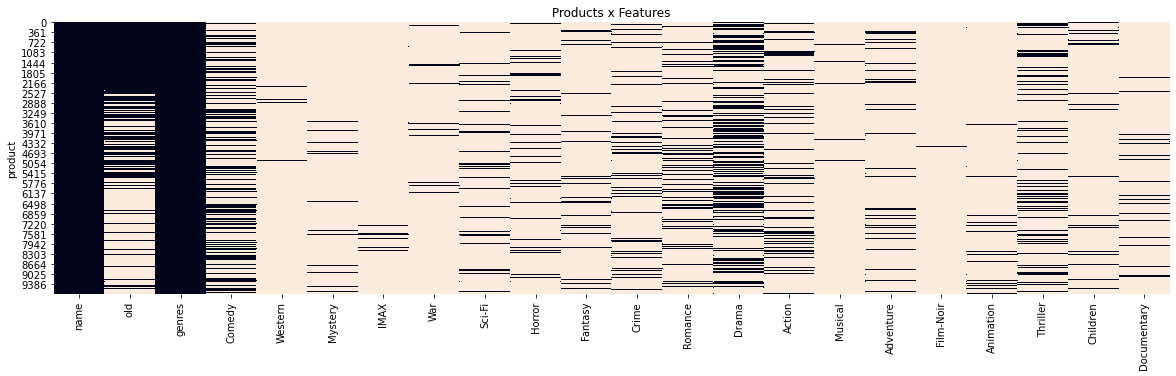

In [17]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df_movies==0, vmin=0, vmax=1, cbar=False, ax=ax).set_title("Products x Features")
plt.show()


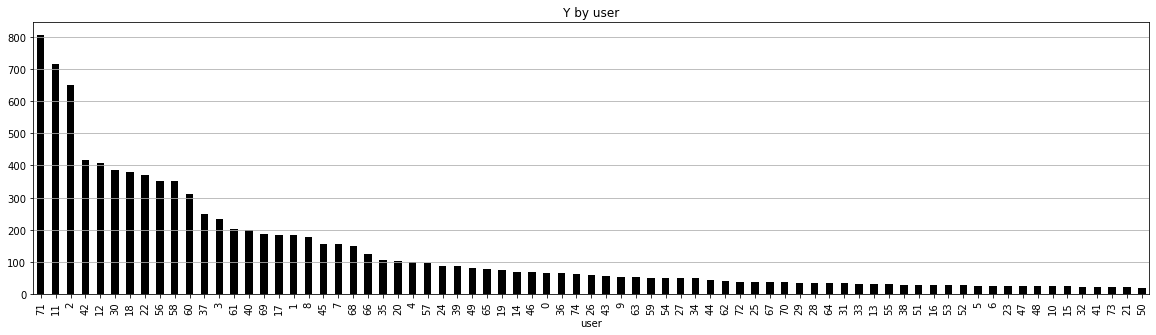

In [18]:
df_ratings.groupby("user").count()["product"].sort_values(ascending=False).plot(
    kind="bar", color="black", title="Y by user", figsize=(20,5)).grid(axis='y')


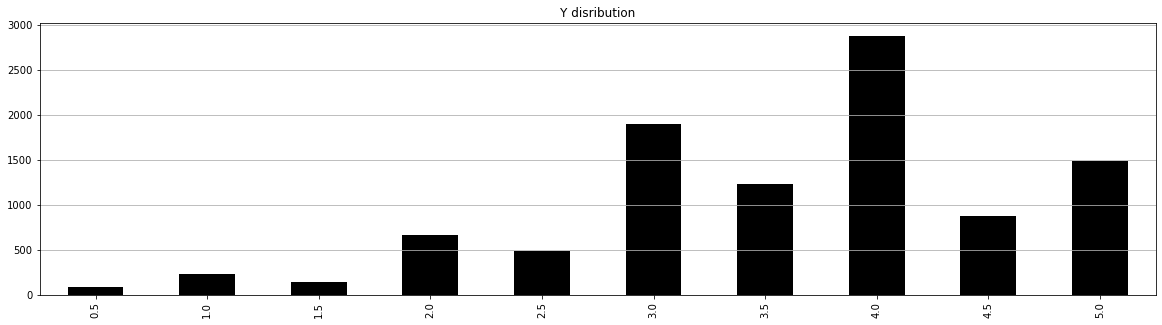

In [19]:
df_ratings["y"].value_counts().sort_index().plot(kind="bar", color="black", title="Y disribution", 
                                                figsize=(20,5)).grid(axis='y')
plt.show()

In [20]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user     10000 non-null  int64  
 1   product  9798 non-null   float64
 2   y        10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 312.5 KB


In [21]:
tmp = df_ratings.copy()
df_ratings = tmp.pivot_table(index="user", columns="product", values="y")
missing_cols = list(set(df_movies.index) - set(df_ratings.columns))
for col in missing_cols:
    df_ratings[col] = np.nan
df_ratings = df_ratings[sorted(df_ratings.columns)]
df_ratings

product,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,9732.0,9733.0,9734.0,9735.0,9736.0,9737.0,9738.0,9739.0,9740.0,9741.0
user,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,2.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


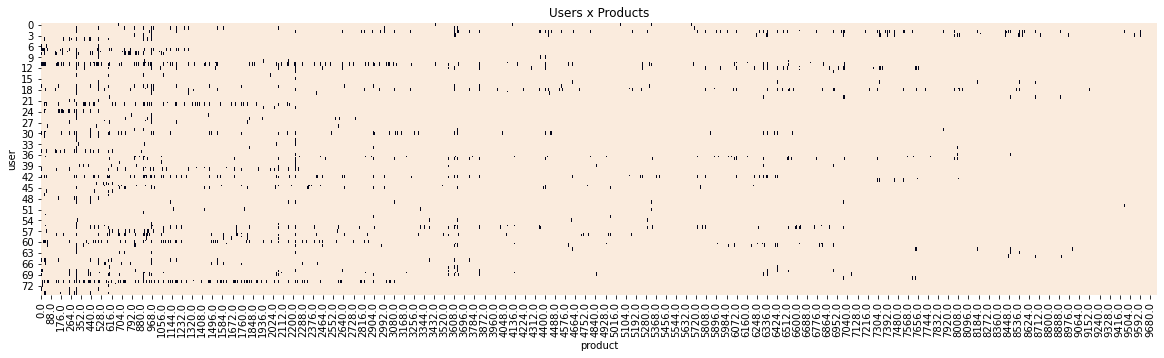

In [22]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df_ratings.isnull(), vmin=0, vmax=1, cbar=False, ax=ax).set_title("Users x Products")
plt.show()

In [23]:
df_ratings = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0.5,1)).fit_transform(df_ratings.values), 
                         columns=df_ratings.columns, index=df_ratings.index)
df_ratings

product,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,9732.0,9733.0,9734.0,9735.0,9736.0,9737.0,9738.0,9739.0,9740.0,9741.0
user,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,0.5,NaN,NaN,NaN,0.75,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,0.666667,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
split = int(0.8*df_ratings.shape[1])
split

7793

In [25]:
# Train
df_train = df_ratings.loc[:, :split-1]
print("non-null data:", df_train[df_train>0].count().sum())
df_train

non-null data: 9371


product,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,7783.0,7784.0,7785.0,7786.0,7787.0,7788.0,7789.0,7790.0,7791.0,7792.0
user,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.5,NaN
3,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,0.5,NaN,NaN,NaN,0.75,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,0.666667,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Test
df_test = df_ratings.loc[:, split:]
print("non-null data:", df_test[df_test>0].count().sum())
df_test

non-null data: 427


product,7793.0,7794.0,7795.0,7796.0,7797.0,7798.0,7799.0,7800.0,7801.0,7802.0,...,9732.0,9733.0,9734.0,9735.0,9736.0,9737.0,9738.0,9739.0,9740.0,9741.0
user,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Select a user
i = 13
train = df_train.iloc[i].to_frame(name="y")
test = df_test.iloc[i].to_frame(name="y")

print("train:", len(train[~train["y"].isna()]), "| test:", len(test[~test["y"].isna()]))
test.head()

train: 25 | test: 6


,y
product,
7793.0,NaN
7794.0,NaN
7795.0,NaN
7796.0,NaN
7797.0,NaN


In [28]:
# add all products in test but empty
tmp = test.copy()
tmp["y"] = np.nan
train = train.append(tmp)
train.tail()

,y
product,
9737.0,NaN
9738.0,NaN
9739.0,NaN
9740.0,NaN
9741.0,NaN


In [29]:
# Model
usr = train[["y"]].fillna(0).values.T
prd = df_movies.drop(["name","genres"],axis=1).values
print("Users", usr.shape, " x  Products", prd.shape)

Users (1, 9742)  x  Products (9742, 20)


In [30]:
# Numpy
#import numpy as np

## usr_ft(users,fatures) = usr(users,products) x prd(products,features)
#usr_ft = np.dot(usr, prd)
## normalize
#weights = usr_ft / usr_ft.sum()
## predicted rating(users,products) = weights(users,fatures) x prd.T(features,products)
#pred = np.dot(weights, prd.T)

#test = test.merge(pd.DataFrame(pred[0], columns=["yhat"]), how="left", left_index=True, right_index=True).reset_index()
#test = test[~test["y"].isna()]
#test.head()

In [31]:
# Tensorflow
import tensorflow as tf

## usr_ft(users,fatures) = usr(users,products) x prd(products,features)
usr_ft = tf.matmul(usr, prd)
## normalize
weights = usr_ft / tf.reduce_sum(usr_ft, axis=1, keepdims=True)
## rating(users,products) = weights(users,fatures) x prd.T(features,products)
pred = tf.matmul(weights, prd.T)

test = test.merge(pd.DataFrame(pred[0], columns=["yhat"]), how="left", left_index=True, right_index=True).reset_index()
test = test[~test["y"].isna()]
test

,product,y,yhat
9,7802.0,1.000,0.260024
101,7894.0,1.000,0.343229
579,8372.0,1.000,0.260024
645,8438.0,0.875,0.087245
1599,9392.0,0.800,0.032871
1728,9521.0,1.000,0.319021


In [32]:
pred

<tf.Tensor: shape=(1, 9742), dtype=float64, numpy=
array([[0.34956343, 0.22722137, 0.3155624 , ..., 0.15617189, 0.07286424,
        0.23235747]])>

In [33]:
# Evaluate
def mean_reciprocal_rank(y_test, predicted):
    score = []
    for product in y_test:
        mrr = 1 / (list(predicted).index(product) + 1) if product in predicted else 0
        score.append(mrr)
    return np.mean(score)

In [34]:
print("--- user", i, "---")

top = 5
y_test = test.sort_values("y", ascending=False)["product"].values[:top]
print("y_test:", y_test)

predicted = test.sort_values("yhat", ascending=False)["product"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 13 ---
y_test: [7802. 7894. 8372. 9521. 8438.]
predicted: [7894. 9521. 7802. 8372. 8438.]
true positive: 5 (100.0%)
accuracy: 20.0%
mrr: 0.46


In [35]:
test.merge(
        df_movies[["name","old","genres"]], left_on="product", right_index=True
    ).sort_values("yhat", ascending=False)

,product,y,yhat,name,old,genres
101,7894.0,1.000,0.343229,Moonrise Kingdom,0,Comedy|Drama|Romance
1728,9521.0,1.000,0.319021,Baby Driver,0,Action|Crime|Thriller
9,7802.0,1.000,0.260024,Intouchables,0,Comedy|Drama
579,8372.0,1.000,0.260024,"Grand Budapest Hotel, The",0,Comedy|Drama
645,8438.0,0.875,0.087245,Edge of Tomorrow,0,Action|Sci-Fi|IMAX
1599,9392.0,0.800,0.032871,Arrival,0,Sci-Fi


# COLLABORATIVE FILTERING

In [36]:
train = df_train.stack(dropna=True).reset_index().rename(columns={0:"y"})
train.head()

,user,product,y
0,0,257.0,1.0
1,0,266.0,0.5
2,0,267.0,1.0
3,0,554.0,1.0
4,0,681.0,0.5


In [37]:
test = df_test.stack(dropna=True).reset_index().rename(columns={0:"y"})
test.head()

,user,product,y
0,2,7842.0,0.875
1,2,7855.0,0.500
2,2,7866.0,0.500
3,2,7881.0,0.500
4,2,7883.0,0.500


In [38]:
embeddings_size = 50
usr, prd = df_ratings.shape[0], df_ratings.shape[1]

# Users (,1,embedding_size) and Reshape (,embedding_size)
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xusers_emb = layers.Embedding(name="xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
xusers = layers.Reshape(name='xusers', target_shape=(embeddings_size,))(xusers_emb)

# Products (,1,embedding_size) and Reshape (,embedding_size)
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))
xproducts_emb = layers.Embedding(name="xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
xproducts = layers.Reshape(name='xproducts', target_shape=(embeddings_size,))(xproducts_emb)

# Product (,1) values[-1,1]
xx = layers.Dot(name='xx', normalize=True, axes=1)([xusers, xproducts])

# Predict ratings (,1)
y_out = layers.Dense(name="y_out", units=1, activation='linear')(xx)

# Compile
model = models.Model(inputs=[xusers_in,xproducts_in], outputs=y_out, name="CollaborativeFiltering")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
model.summary()

Model: "CollaborativeFiltering"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 xusers_in (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 xproducts_in (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 xusers_emb (Embedding)         (None, 1, 50)        3750        ['xusers_in[0][0]']              
                                                                                                  
 xproducts_emb (Embedding)      (None, 1, 50)        487100      ['xproducts_in[0][0]']           
                                                                             

In [39]:
from tensorflow.keras.utils import plot_model

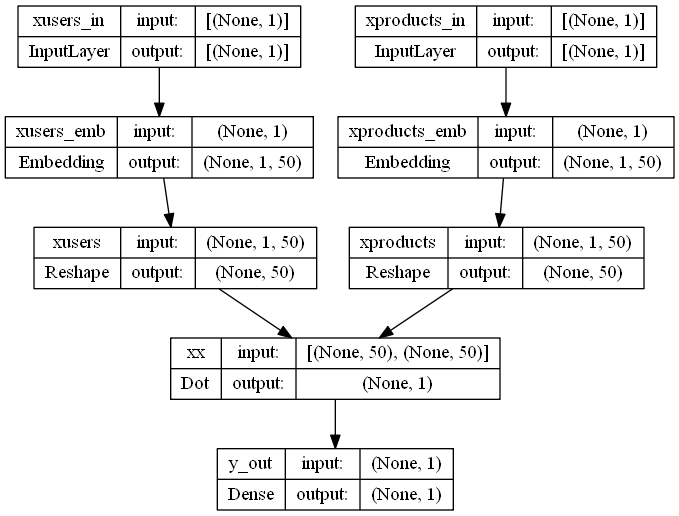

In [40]:
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [41]:
'''
Plot loss and metrics of keras training.
'''
def utils_plot_keras_training(training):
    metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
    
    ## training
    ax[0].set(title="Training")
    ax11 = ax[0].twinx()
    ax[0].plot(training.history['loss'], color='black')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
    ax11.legend()
    
    ## validation
    ax[1].set(title="Validation")
    ax22 = ax[1].twinx()
    ax[1].plot(training.history['val_loss'], color='black')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax22.plot(training.history['val_'+metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")
    plt.show()

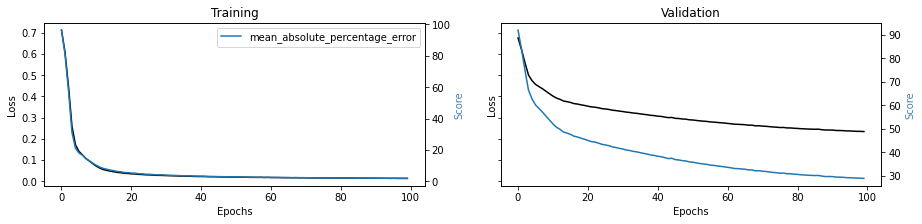

In [42]:
# train
training = model.fit(x=[train["user"], train["product"]], y=train["y"], 
                     epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)
model = training.model
utils_plot_keras_training(training)

In [43]:
# test
test["yhat"] = model.predict([test["user"], test["product"]])
test

14/14 [==============================] - 0s 2ms/step


,user,product,y,yhat
0,2,7842.0,0.875,0.618869
1,2,7855.0,0.500,0.680004
2,2,7866.0,0.500,0.610256
3,2,7881.0,0.500,0.538271
4,2,7883.0,0.500,0.438253
...,...,...,...,...
422,64,9328.0,0.500,0.605708
423,67,8910.0,0.500,0.659199
424,67,9099.0,0.500,0.602878
425,70,8063.0,0.500,0.445787


In [44]:
# overall
y_test = test["y"]
predicted = test["yhat"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2))+"%")

Mean Absolute Error (Σ|y-pred|/n): 0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.45%


In [45]:
# single case
i = 13
print("--- user", i, "---")

top = 5
y_test = test[test["user"]==i].sort_values("y", ascending=False)["product"].values[:top]
print("y_test:", y_test)

predicted = test[test["user"]==i].sort_values("yhat", ascending=False)["product"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 13 ---
y_test: [7802. 7894. 8372. 9521. 8438.]
predicted: [8372. 9521. 7802. 8438. 7894.]
true positive: 5 (100.0%)
accuracy: 0.0%
mrr: 0.46


In [46]:
test[test["user"]==i].merge(
        df_movies[["name","old","genres"]], left_on="product", right_index=True
    ).sort_values("yhat", ascending=False)

,user,product,y,yhat,name,old,genres
213,13,8372.0,1.000,0.615874,"Grand Budapest Hotel, The",0,Comedy|Drama
216,13,9521.0,1.000,0.550393,Baby Driver,0,Action|Crime|Thriller
211,13,7802.0,1.000,0.533949,Intouchables,0,Comedy|Drama
214,13,8438.0,0.875,0.475257,Edge of Tomorrow,0,Action|Sci-Fi|IMAX
212,13,7894.0,1.000,0.391141,Moonrise Kingdom,0,Comedy|Drama|Romance
215,13,9392.0,0.800,0.390012,Arrival,0,Sci-Fi


# Neural Collaborative Filtering

In [47]:
train = df_train.stack(dropna=True).reset_index().rename(columns={0:"y"})
train.head()

,user,product,y
0,0,257.0,1.0
1,0,266.0,0.5
2,0,267.0,1.0
3,0,554.0,1.0
4,0,681.0,0.5


In [48]:
test = df_test.stack(dropna=True).reset_index().rename(columns={0:"y"})
test.head()

,user,product,y
0,2,7842.0,0.875
1,2,7855.0,0.500
2,2,7866.0,0.500
3,2,7881.0,0.500
4,2,7883.0,0.500


In [49]:
embeddings_size = 50
usr, prd = df_ratings.shape[0], df_ratings.shape[1]

# Input layer
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

# A) Matrix Factorization
## embeddings and reshape
cf_xusers_emb = layers.Embedding(name="cf_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
cf_xusers = layers.Reshape(name='cf_xusers', target_shape=(embeddings_size,))(cf_xusers_emb)
## embeddings and reshape
cf_xproducts_emb = layers.Embedding(name="cf_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
cf_xproducts = layers.Reshape(name='cf_xproducts', target_shape=(embeddings_size,))(cf_xproducts_emb)
## product
cf_xx = layers.Dot(name='cf_xx', normalize=True, axes=1)([cf_xusers, cf_xproducts])

# B) Neural Network
## embeddings and reshape
nn_xusers_emb = layers.Embedding(name="nn_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
nn_xusers = layers.Reshape(name='nn_xusers', target_shape=(embeddings_size,))(nn_xusers_emb)
## embeddings and reshape
nn_xproducts_emb = layers.Embedding(name="nn_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
nn_xproducts = layers.Reshape(name='nn_xproducts', target_shape=(embeddings_size,))(nn_xproducts_emb)
## concat and dense
nn_xx = layers.Concatenate()([nn_xusers, nn_xproducts])
nn_xx = layers.Dense(name="nn_xx", units=int(embeddings_size/2), activation='relu')(nn_xx)

# Merge A & B
y_out = layers.Concatenate()([cf_xx, nn_xx])
y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)

# Compile
model = models.Model(inputs=[xusers_in,xproducts_in], outputs=y_out, name="Neural_CollaborativeFiltering")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
model.summary()

Model: "Neural_CollaborativeFiltering"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 xusers_in (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 xproducts_in (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 nn_xusers_emb (Embedding)      (None, 1, 50)        3750        ['xusers_in[0][0]']              
                                                                                                  
 nn_xproducts_emb (Embedding)   (None, 1, 50)        487100      ['xproducts_in[0][0]']           
                                                                      

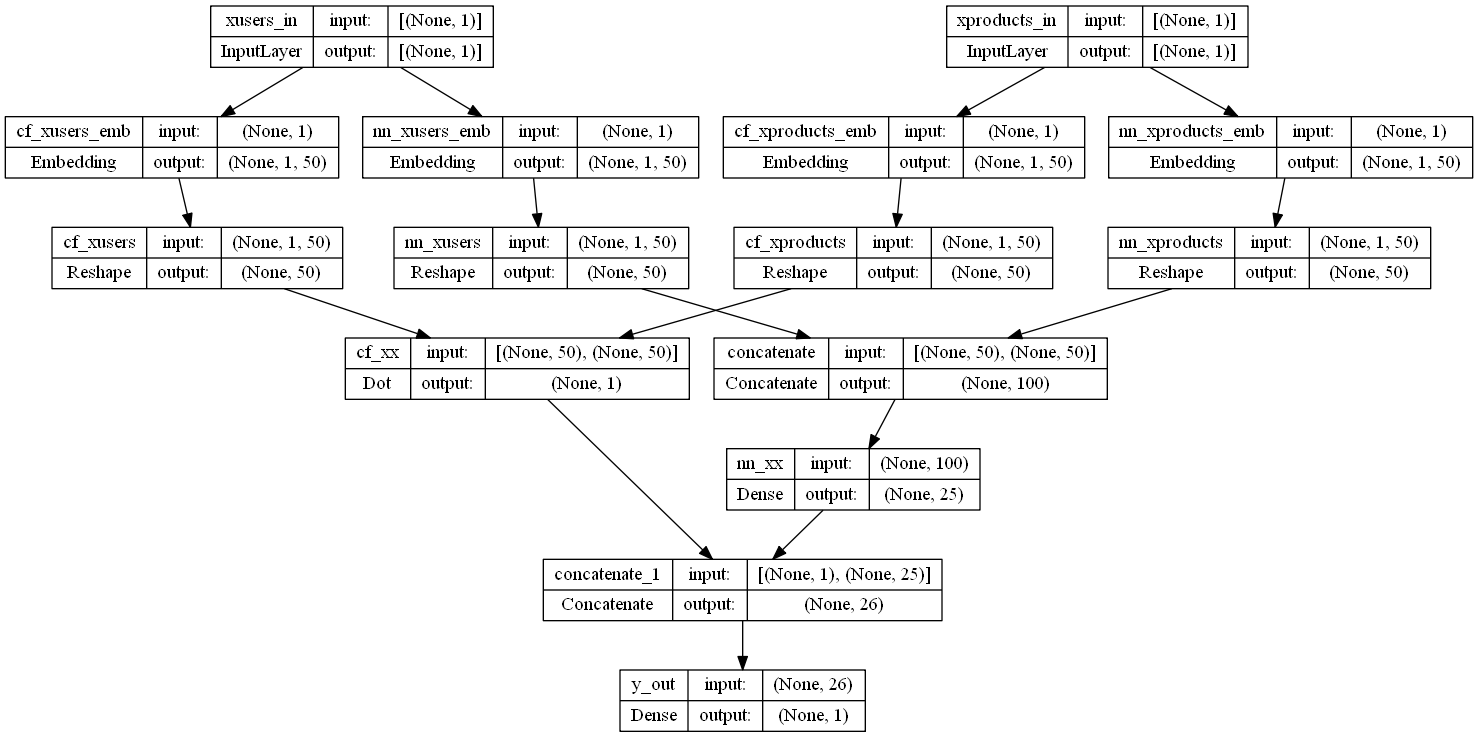

In [50]:
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


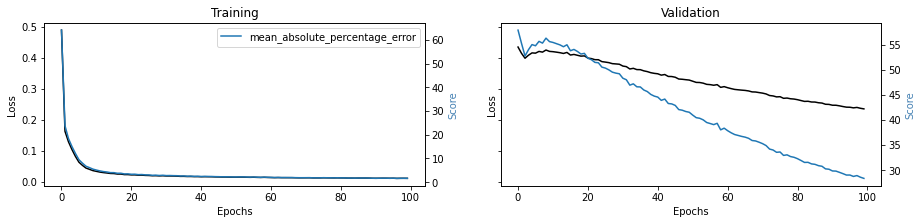

In [51]:
# train
training = model.fit(x=[train["user"], train["product"]], y=train["y"], 
                     epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)
model = training.model
utils_plot_keras_training(training)

In [52]:
# test
test["yhat"] = model.predict([test["user"], test["product"]])
test

14/14 [==============================] - 0s 3ms/step


,user,product,y,yhat
0,2,7842.0,0.875,0.801632
1,2,7855.0,0.500,0.738128
2,2,7866.0,0.500,0.798307
3,2,7881.0,0.500,0.773052
4,2,7883.0,0.500,0.655206
...,...,...,...,...
422,64,9328.0,0.500,0.438487
423,67,8910.0,0.500,0.521523
424,67,9099.0,0.500,0.541058
425,70,8063.0,0.500,0.493329


In [53]:
# overall
y_test = test["y"]
predicted = test["yhat"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2))+"%")

Mean Absolute Error (Σ|y-pred|/n): 0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.29%


In [54]:
# single case
i = 16
print("--- user", i, "---")

top = 5
y_test = test[test["user"]==i].sort_values("y", ascending=False)["product"].values[:top]
print("y_test:", y_test)

predicted = test[test["user"]==i].sort_values("yhat", ascending=False)["product"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 16 ---
y_test: [8179. 8546. 8151. 8686. 8696.]
predicted: [8546. 8879. 8151. 8179. 8696.]
true positive: 4 (80.0%)
accuracy: 40.0%
mrr: 0.36


In [55]:
test[test["user"]==i].merge(
        df_movies[["name","old","genres"]], left_on="product", right_index=True
    ).sort_values("yhat", ascending=False)

,user,product,y,yhat,name,old,genres
223,16,8546.0,1.000000,0.742020,Big Hero 6,0,Action|Animation|Comedy
226,16,8879.0,0.500000,0.718805,The Martian,0,Adventure|Drama|Sci-Fi
218,16,8151.0,1.000000,0.711819,Iron Man 3,0,Action|Sci-Fi|Thriller|IMAX
219,16,8179.0,1.000000,0.697483,Now You See Me,0,Crime|Mystery|Thriller
225,16,8696.0,0.666667,0.697330,Captain America: Civil War,0,Action|Sci-Fi|Thriller
220,16,8200.0,0.500000,0.669582,Despicable Me 2,0,Animation|Children|Comedy|IMAX
221,16,8357.0,0.500000,0.658943,The Lego Movie,0,Action|Adventure|Animation|Children|Comedy|Fan...
224,16,8686.0,0.666667,0.646423,Avengers: Age of Ultron,0,Action|Adventure|Sci-Fi
222,16,8438.0,0.500000,0.643147,Edge of Tomorrow,0,Action|Sci-Fi|IMAX
227,16,9392.0,0.500000,0.637985,Arrival,0,Sci-Fi


In [56]:
# Extra data
features = df_movies.drop(["genres","name"], axis=1).columns
print(features)

context = df_context.drop(["user","product"], axis=1).columns
print(context)

Index(['old', 'Comedy', 'Western', 'Mystery', 'IMAX', 'War', 'Sci-Fi',
       'Horror', 'Fantasy', 'Crime', 'Romance', 'Drama', 'Action', 'Musical',
       'Adventure', 'Film-Noir', 'Animation', 'Thriller', 'Children',
       'Documentary'],
      dtype='object')
Index(['daytime', 'weekend'], dtype='object')


In [57]:
train = df_train.stack(dropna=True).reset_index().rename(columns={0:"y"})

## add features
train = train.merge(df_movies[features], how="left", left_on="product", right_index=True)

## add context
train = train.merge(df_context, how="left")

train.head()

,user,product,y,old,Comedy,Western,Mystery,IMAX,War,Sci-Fi,...,Action,Musical,Adventure,Film-Noir,Animation,Thriller,Children,Documentary,daytime,weekend
0,0,257.0,1.0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,266.0,0.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,267.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,554.0,1.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,681.0,0.5,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [58]:
test = df_test.stack(dropna=True).reset_index().rename(columns={0:"y"})

## add features
test = test.merge(df_movies.drop(["genres","name"], axis=1), how="left", left_on="product", right_index=True)

## add context
test[context] = 0 #--> simulate production for a weekday night
#test = test.merge(dtf_context, how="left") #--> use test set

test.head()

,user,product,y,old,Comedy,Western,Mystery,IMAX,War,Sci-Fi,...,Action,Musical,Adventure,Film-Noir,Animation,Thriller,Children,Documentary,daytime,weekend
0,2,7842.0,0.875,0,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
1,2,7855.0,0.500,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,2,7866.0,0.500,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,2,7881.0,0.500,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,7883.0,0.500,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [59]:
embeddings_size = 50
usr, prd = df_ratings.shape[0], df_ratings.shape[1]
feat = len(features)
ctx = len(context)

########################################## COLLABORATIVE FILTERING ###################################################
# Input layer
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

# A) Matrix Factorization
## embeddings and reshape
cf_xusers_emb = layers.Embedding(name="cf_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
cf_xusers = layers.Reshape(name='cf_xusers', target_shape=(embeddings_size,))(cf_xusers_emb)
## embeddings and reshape
cf_xproducts_emb = layers.Embedding(name="cf_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
cf_xproducts = layers.Reshape(name='cf_xproducts', target_shape=(embeddings_size,))(cf_xproducts_emb)
## product
cf_xx = layers.Dot(name='cf_xx', normalize=True, axes=1)([cf_xusers, cf_xproducts])

# B) Neural Network
## embeddings and reshape
nn_xusers_emb = layers.Embedding(name="nn_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
nn_xusers = layers.Reshape(name='nn_xusers', target_shape=(embeddings_size,))(nn_xusers_emb)
## embeddings and reshape
nn_xproducts_emb = layers.Embedding(name="nn_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
nn_xproducts = layers.Reshape(name='nn_xproducts', target_shape=(embeddings_size,))(nn_xproducts_emb)
## concat and dense
nn_xx = layers.Concatenate()([nn_xusers, nn_xproducts])
nn_xx = layers.Dense(name="nn_xx", units=int(embeddings_size/2), activation='relu')(nn_xx)

########################################## CONTENT BASED ###################################################
# Product Features
features_in = layers.Input(name="features_in", shape=(feat,))
features_x = layers.Dense(name="features_x", units=feat, activation='relu')(features_in)

########################################## KNOWLEDGE BASED #################################################
# Context
contexts_in = layers.Input(name="contexts_in", shape=(ctx,))
context_x = layers.Dense(name="context_x", units=ctx, activation='relu')(contexts_in)

########################################## OUTPUT ###################################################
# Merge all
y_out = layers.Concatenate()([cf_xx, nn_xx, features_x, context_x])
y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)

# Compile
model = models.Model(inputs=[xusers_in,xproducts_in, features_in, contexts_in], outputs=y_out, name="Hybrid_Model")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
model.summary()

Model: "Hybrid_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 xusers_in (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 xproducts_in (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 nn_xusers_emb (Embedding)      (None, 1, 50)        3750        ['xusers_in[0][0]']              
                                                                                                  
 nn_xproducts_emb (Embedding)   (None, 1, 50)        487100      ['xproducts_in[0][0]']           
                                                                                       

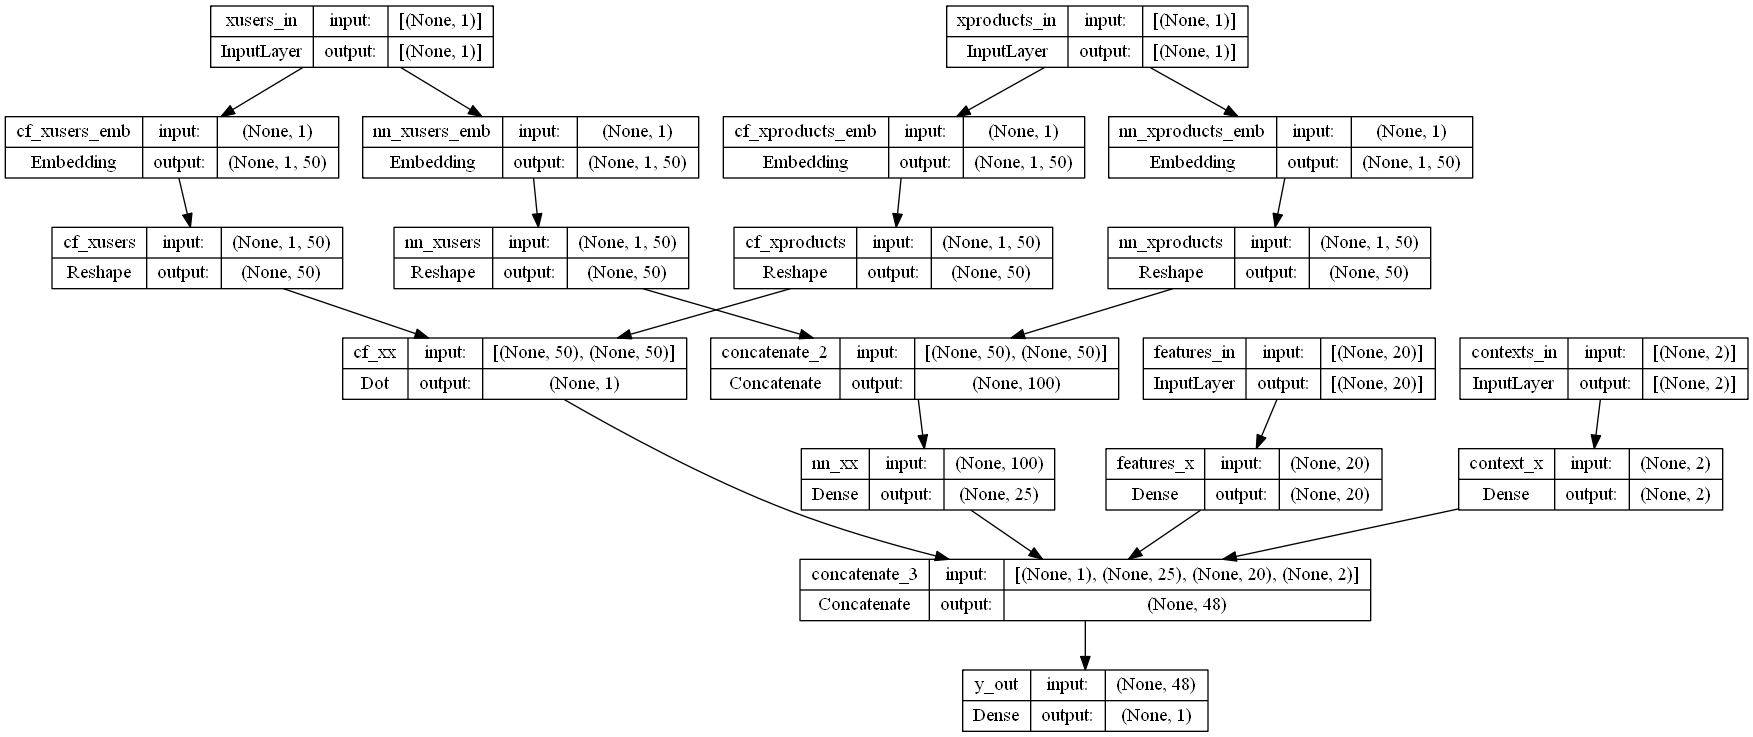

In [60]:
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [61]:
# train
training = model.fit(x=[train["user"], train["product"], train[features], train[context]], y=train["y"], 
                     epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)

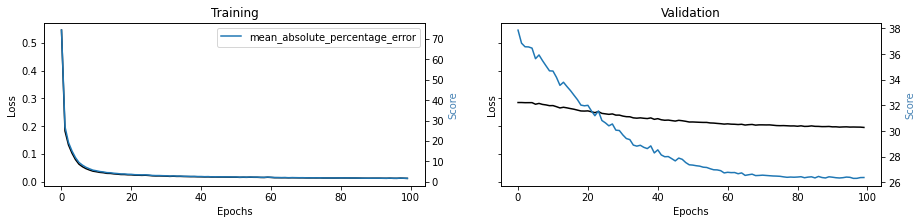

In [62]:
model = training.model
utils_plot_keras_training(training)

In [63]:
# test
test["yhat"] = model.predict([test["user"], test["product"], test[features], test[context]])
test

14/14 [==============================] - 0s 3ms/step


,user,product,y,old,Comedy,Western,Mystery,IMAX,War,Sci-Fi,...,Musical,Adventure,Film-Noir,Animation,Thriller,Children,Documentary,daytime,weekend,yhat
0,2,7842.0,0.875,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0.718621
1,2,7855.0,0.500,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.775512
2,2,7866.0,0.500,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0.630772
3,2,7881.0,0.500,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.738186
4,2,7883.0,0.500,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0.872959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,64,9328.0,0.500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.609491
423,67,8910.0,0.500,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.614189
424,67,9099.0,0.500,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.543177
425,70,8063.0,0.500,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.502055


In [64]:
# overall
y_test = test["y"]
predicted = test["yhat"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2))+"%")

Mean Absolute Error (Σ|y-pred|/n): 0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.28%


In [65]:
# single case
i = 36
print("--- user", i, "---")

top = 5
y_test = test[test["user"]==i].sort_values("y", ascending=False)["product"].values[:top]
print("y_test:", y_test)

predicted = test[test["user"]==i].sort_values("yhat", ascending=False)["product"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 36 ---
y_test: [8005. 8063. 8453. 8681. 8376.]
predicted: [8545. 8255. 8900. 8376. 7802.]
true positive: 1 (20.0%)
accuracy: 0.0%
mrr: 0.05
